# 直方图与直方图均衡化（面试常考）
## 不同图片的直方图

In [3]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt

In [4]:
def trans2show(img):
    return cv2.cvtColor(img, 4)

img = cv2.imread('assets/61720094082_.pic.jpg')
dog = cv2.imread('assets/dog.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
dog_gray = cv2.cvtColor(dog, cv2.COLOR_RGB2GRAY)


In [5]:
# 直方图
hist = np.zeros(256)
rows = img.shape[0]
cols = img.shape[1]
for i in range(rows):
    for j in range(cols):
        tmp = gray[i][j]
        hist[tmp] = hist[tmp] + 1

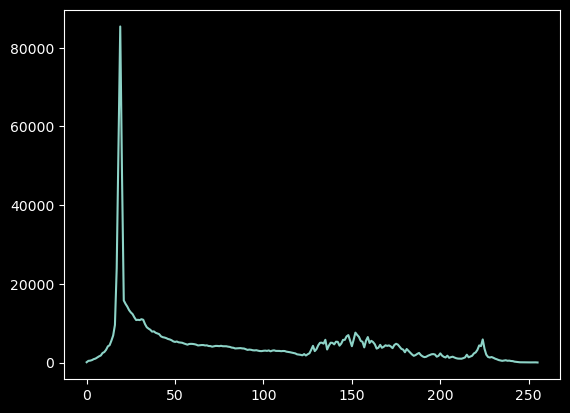

In [6]:
plt.plot(hist)
plt.show()

(256,)
[8.60000e+01 1.03000e+02 2.65000e+02 5.63000e+02 3.76200e+03 3.52880e+04
 1.81466e+05 1.17169e+05 6.81120e+04 5.72400e+04 4.20830e+04 4.40830e+04
 4.77610e+04 4.21350e+04 4.51720e+04 4.19310e+04 4.21700e+04 4.03160e+04
 3.96310e+04 4.21060e+04 4.13910e+04 4.43660e+04 4.53340e+04 4.46530e+04
 3.90900e+04 3.06530e+04 2.61740e+04 2.15680e+04 1.89610e+04 1.79350e+04
 1.69020e+04 1.60770e+04 1.57410e+04 1.49600e+04 1.45050e+04 1.42800e+04
 1.43590e+04 1.40650e+04 1.46980e+04 1.52520e+04 1.55390e+04 1.57670e+04
 1.43110e+04 1.30730e+04 1.15090e+04 1.07740e+04 1.02630e+04 9.86800e+03
 9.99800e+03 1.01650e+04 1.01730e+04 1.01270e+04 1.02690e+04 1.04120e+04
 1.02520e+04 1.03600e+04 1.01460e+04 9.81000e+03 9.51500e+03 9.05300e+03
 8.66800e+03 8.27000e+03 8.03300e+03 7.96400e+03 7.93000e+03 7.82000e+03
 7.61300e+03 7.61900e+03 7.62000e+03 7.49600e+03 7.38800e+03 7.79900e+03
 7.84600e+03 8.10300e+03 8.35000e+03 8.57700e+03 9.01200e+03 9.19700e+03
 8.99400e+03 8.98000e+03 8.75600e+03 8.57600

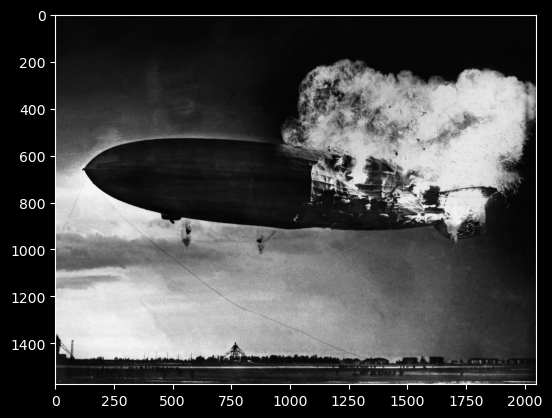

In [7]:
# 直方图
hist = np.zeros(256)
img2 = cv2.imread('assets/38.jpg')
rows = img2.shape[0]
cols = img2.shape[1]
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
for i in range(rows):
    for j in range(cols):
         tmp = gray[i][j]
         hist[tmp]=hist[tmp]+1

print(hist.shape)
print(hist)
plt.imshow(trans2show(img2))

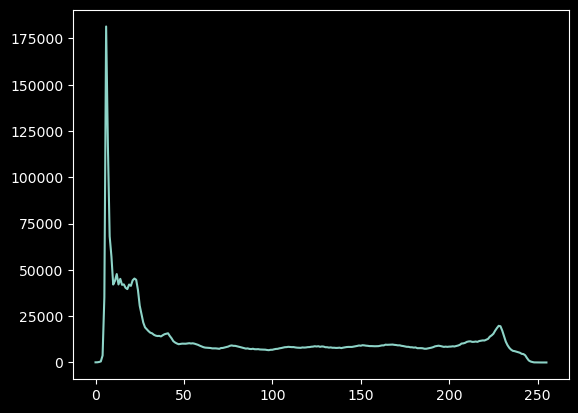

In [8]:
plt.plot(hist)
plt.show()

## 直方图均衡化

In [15]:
trans = hist/(rows*cols)*255
for i in range(1,len(trans)):
    trans[i]=trans[i-1]+trans[i]

[6.79873512e-03 8.14267113e-03 2.09495908e-02 4.45079985e-02
 2.97405134e-01 2.78969494e+00 1.43458054e+01 9.26280227e+00
 5.38459821e+00 4.52511161e+00 3.32687407e+00 3.48498419e+00
 3.77574870e+00 3.33098493e+00 3.57107515e+00 3.31485770e+00
 3.33375186e+00 3.18718378e+00 3.13303106e+00 3.32869234e+00
 3.27216797e+00 3.50735677e+00 3.58388207e+00 3.53004557e+00
 3.09026228e+00 2.42327474e+00 2.06918713e+00 1.70505952e+00
 1.49896298e+00 1.41785249e+00 1.33618862e+00 1.27096819e+00
 1.24440569e+00 1.18266369e+00 1.14669364e+00 1.12890625e+00
 1.13515160e+00 1.11190941e+00 1.16195126e+00 1.20574777e+00
 1.22843657e+00 1.24646112e+00 1.13135696e+00 1.03348679e+00
 9.09844680e-01 8.51739211e-01 8.11342076e-01 7.80115327e-01
 7.90392485e-01 8.03594680e-01 8.04227121e-01 8.00590588e-01
 8.11816406e-01 8.23121280e-01 8.10472470e-01 8.19010417e-01
 8.02092634e-01 7.75530134e-01 7.52208891e-01 7.15685454e-01
 6.85249256e-01 6.53785342e-01 6.35049293e-01 6.29594494e-01
 6.26906622e-01 6.182105

In [14]:
print(int(trans[200]))
print(trans.shape)

217
(256,)


In [11]:
gray_h = gray.copy()
for i in range(rows):
    for j in range(cols):
        gray_h[i][j] = int(trans[gray[i][j]])

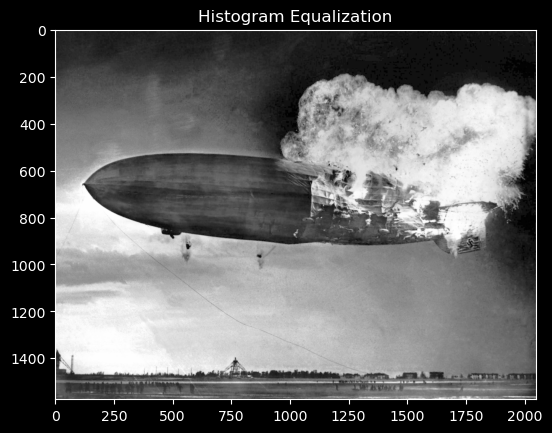

In [12]:
plt.imshow(gray_h,cmap='gray')
plt.title("Histogram Equalization")
plt.show()

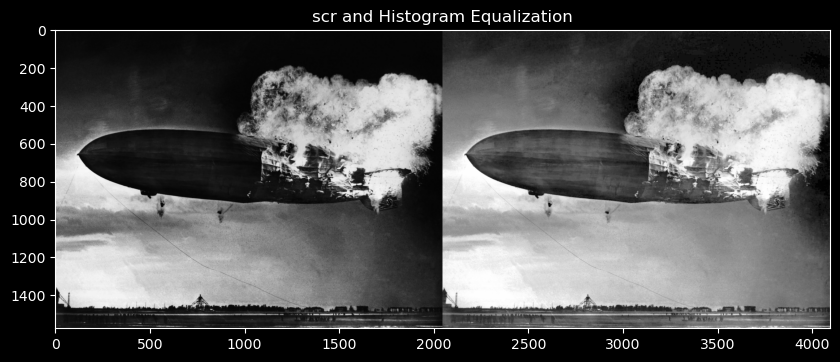

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.hconcat([gray, gray_h]), cmap='gray')
plt.title("scr and Histogram Equalization")
plt.show()

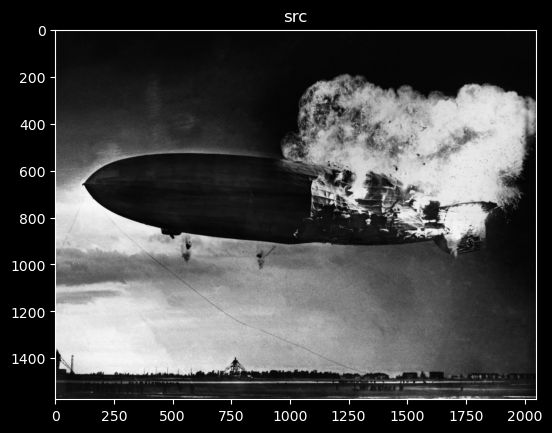

In [14]:
plt.imshow(gray,cmap='gray')
plt.title("src")
plt.show()

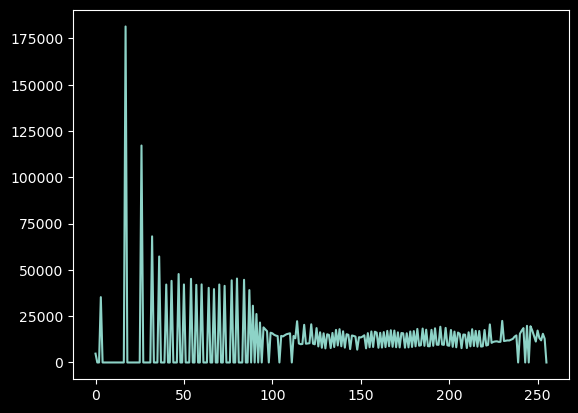

In [15]:
hist_h=np.zeros(256)
for i in range(rows):
    for j in range(cols):
         tmp = gray_h[i][j]
         hist_h[tmp]=hist_h[tmp]+1
plt.plot(hist_h)
plt.show()